Pytorch Basics

In [ ]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt

In [ ]:
trainingdata = torchvision.datasets.FashionMNIST('./FashionMNIST/',train=True,download=True,transform=torchvision.transforms.ToTensor())
testdata = torchvision.datasets.FashionMNIST('./FashionMNIST/',train=False,download=True,transform=torchvision.transforms.ToTensor())


  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



In [ ]:
trainDataLoader = torch.utils.data.DataLoader(trainingdata,batch_size=128,shuffle=True) #loads images in batches of 64
testDataLoader = torch.utils.data.DataLoader(testdata,batch_size=128,shuffle=False)

In [ ]:
import torch.nn as nn
class LinearReg(torch.nn.Module):
  def __init__(self): # sets up architecture of the model with input and output node counts
    super(LinearReg, self).__init__()
    self.linear = torch.nn.Linear(28*28, 10) #(input dimension (pixels), output dimension (labels))
    self.model = nn.Sequential(
        nn.Linear(784, 256),
        nn.ReLU(),
        nn.Linear(256, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 10),
        nn.Softmax()
    )


  
  def forward(self, x): #formats the input data so it can be read by the model
    x = x.view(-1, 28*28) # change so 784 vector long instead of 28x28 matrix
    return self.model(x) #gets outputs of labels 

model = LinearReg() # Step 1: architecture
loss = torch.nn.CrossEntropyLoss() # Step 2: loss
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) # Step 3: training method
     

In [ ]:
train_loss_history = [] # used to track loss in the training dataset
test_loss_history = [] # used to track loss in the test dataset

# Training process
# training network on training data
for epoch in range(30):
  train_loss = 0.0
  test_loss = 0.0
  for i, data in enumerate(trainDataLoader): # loop through training data
    images, labels = data #splits data
    optimizer.zero_grad() #magic
    predicted_output = model(images) # run the model on the images and store its prediction
    fit = loss(predicted_output, labels) # calculates the loss function for model accuracy
    fit.backward() # computes the gradient of the loss tensor
    optimizer.step() #performs a round of optimization
    train_loss += fit.item() / len(trainingdata) #adds the loss to the total loss for that epoch
    #to compare because the lengths of training and test are not the same
# Validation
# How well are we doing on data we haven't seen yet?

  for i, data in enumerate(testDataLoader):
    with torch.no_grad():
      images, labels = data
      predicted_output = model(images)
      fit = loss(predicted_output, labels)
      test_loss += fit.item() / len(testdata)
  train_loss_history += [train_loss] 
  test_loss_history += [test_loss]
  print(f'Epoch {epoch}, Train loss {train_loss}, Test loss {test_loss}')

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/container.py:204: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Epoch 0, Train loss 0.01799738526344296, Test loss 0.01818626461029052
Epoch 1, Train loss 0.01799128493070603, Test loss 0.018180249619483946
Epoch 2, Train loss 0.017985045814514166, Test loss 0.018173562240600596
Epoch 3, Train loss 0.017977523215611763, Test loss 0.01816516559123993
Epoch 4, Train loss 0.017968041789531708, Test loss 0.018154363608360292
Epoch 5, Train loss 0.017955209414164227, Test loss 0.01813903112411499
Epoch 6, Train loss 0.017936010781923927, Test loss 0.01811502294540405
Epoch 7, Train loss 0.017903660190105457, Test loss 0.018070810818672185
Epoch 8, Train loss 0.017836454621950795, Test loss 0.017970486164093018
Epoch 9, Train loss 0.017639294906457277, Test loss 0.017609318351745604
Epoch 10, Train loss 0.017199900941054006, Test loss 0.017212201642990116
Epoch 11, Train loss 0.016759768195947, Test loss 0.01660888202190399
Epoch 12, Train loss 0.016099170676867173, Test loss 0.016040403187274937
Epoch 13, Train loss 0.01570859369834263, Test loss 0.0157

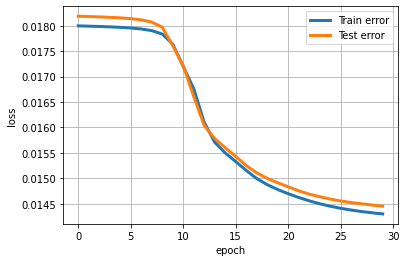

In [ ]:
plt.plot(range(30),train_loss_history,'-',linewidth=3, label='Train error')
plt.plot(range(30),test_loss_history,'-',linewidth=3, label='Test error')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.legend()
plt.show()

Predicted: [9 2 1]


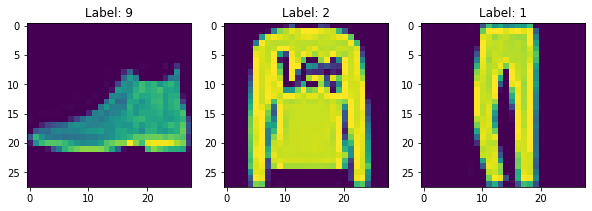

In [ ]:
images, labels = next(iter(testDataLoader))
plt.figure(figsize=(10,10))

predicted_output = model(images)
print('Predicted:', torch.max(predicted_output, 1)[1].numpy()[0:3])

for index in np.arange(0,3): 
    plt.subplot(1,3,index+1)
    plt.title(f'Label: {labels[index].item()}')
    plt.imshow(images[index].cpu().squeeze().numpy())



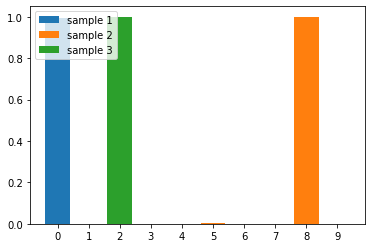

In [ ]:

guess = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
predict1 = predicted_output.detach().numpy()[1]
predict2 = predicted_output.detach().numpy()[2]
predict3 = predicted_output.detach().numpy()[3]
plt.bar(guess, predict1, label = "sample 1")
plt.bar(guess, predict2, label = "sample 2")
plt.bar(guess, predict3, label = "sample 3")
plt.legend(loc = "upper left")
plt.show()

Based on this predicted probability, the model is very sure about sample 1 being 0, sample 2 being 8 and sample 3 being 2. Looking at the output below for the 1st, 2nd, and 3rd indices, we see that the model is correct. 

In [ ]:
images, labels = next(iter(trainDataLoader))
predicted_output = model(images)
print('Predicted:', torch.max(predicted_output, 1)[1])
fit = loss(predicted_output, labels)
print('True labels:', labels)
print(fit.item())


Predicted: tensor([7, 0, 8, 2, 7, 1, 1, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 7, 5, 2, 5,
        0, 2, 9, 5, 0, 8, 7, 7, 8, 0, 9, 5, 9, 1, 0, 2, 1, 1, 1, 9, 0, 2, 1, 5,
        2, 2, 7, 7, 2, 0, 1, 8, 2, 2, 2, 0, 1, 8, 2, 8, 0, 1, 2, 8, 8, 9, 1, 0,
        2, 2, 9, 7, 0, 0, 2, 2, 8, 8, 1, 0, 5, 2, 1, 0, 5, 7, 5, 2, 2, 7, 1, 0,
        7, 7, 2, 7, 9, 0, 8, 5, 9, 2, 2, 5, 5, 0, 1, 1, 7, 8, 1, 7, 9, 1, 2, 9,
        2, 7, 2, 7, 2, 1, 2, 0])
True labels: tensor([7, 0, 8, 2, 7, 3, 1, 0, 0, 6, 2, 1, 4, 2, 6, 2, 6, 6, 6, 5, 9, 5, 2, 5,
        0, 4, 9, 5, 0, 8, 7, 7, 8, 0, 9, 5, 5, 1, 3, 6, 1, 1, 3, 9, 3, 6, 1, 5,
        4, 4, 9, 7, 6, 0, 1, 8, 6, 2, 6, 3, 1, 8, 4, 6, 0, 1, 6, 8, 8, 9, 3, 0,
        6, 8, 9, 7, 0, 0, 2, 4, 5, 8, 3, 0, 5, 4, 3, 0, 5, 7, 5, 6, 6, 7, 3, 0,
        7, 7, 2, 7, 9, 3, 8, 5, 9, 2, 6, 5, 5, 6, 1, 3, 5, 8, 1, 7, 9, 1, 2, 9,
        2, 7, 4, 7, 2, 1, 2, 6])
1.8236931562423706
